Trabalho 1

Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\dot C = -e^{-\frac{10}{T+273}}*C$ 

$\dot T = 1000 * e^{-\frac{10}{T+273}}*C - 10 * (T-20)$ 

Sistema de equações

In [2]:
def sistema(x, t):
        f1, f2 = x
        dx1dt = -np.exp((-10)/(f2+273))*f1
        dx2dt = (1000*np.exp((-10)/(f2+273))*f1)-(10*(f2-20))
        return np.array([dx1dt, dx2dt])

Função para solucionar EDO usando Runge-Kutta clássico de 4ª ordem

In [3]:
def rk4(f, x0, t):
    x = np.zeros((len(t), len(x0)))
    x[0] = x0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(x[i-1], t[i-1])
        k2 = f(x[i-1] + 0.5*dt*k1, t[i-1] + 0.5*dt)
        k3 = f(x[i-1] + 0.5*dt*k2, t[i-1] + 0.5*dt)
        k4 = f(x[i-1] + dt*k3, t[i])
        x[i] = x[i-1] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return x

Condições iniciais:

In [4]:
Tini = 35 # temperatura inicial em graus Celsius
Cini = 5 # concentração inicial em gmol/L

x0 = [Cini, Tini] # vetor de condições iniciais
t = np.linspace(0, 10, 1001) # vetor de tempo de 0 a 10 segundos com 1001 pontos, ou seja, com um passo de 0.01 segundos

Obtem a solução:

In [5]:
solucao = rk4(sistema, x0, t)

Plota o resultado:

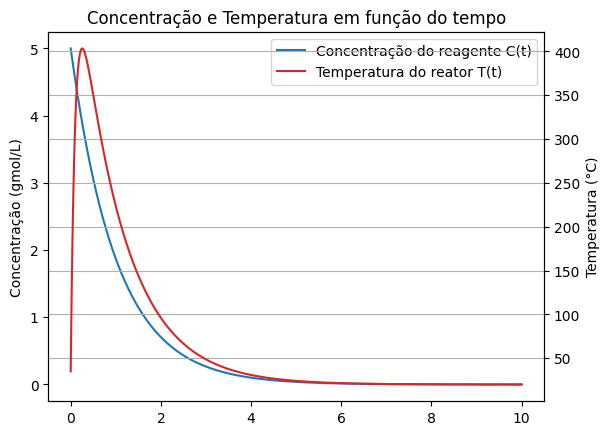

In [6]:

fig, ax = plt.subplots()

plotC = ax.plot(t, solucao[:, 0],
             label='Concentração do reagente C(t)', color='tab:blue') # plota o gráfico da concentração

ax2 = ax.twinx()
plotT = ax2.plot(t, solucao[:, 1], label='Temperatura do reator T(t)', color='tab:red') 

ax.set_ylabel('Concentração (gmol/L)')
ax2.set_ylabel('Temperatura (°C)')
plt.xlabel('Tempo (s)')
titulo = 'Concentração e Temperatura em função do tempo'
plt.title(titulo)
plt.grid()
ax.legend(handles=[plotC[0], plotT[0]])
# plt.show()
plt.savefig('docs/img/trab1/'+titulo+'.png')

Validando o resultado:

Utilizando pacotes conhecidos do python como o sympy.solve_ivp utilizando o método Runge-Kutta 45

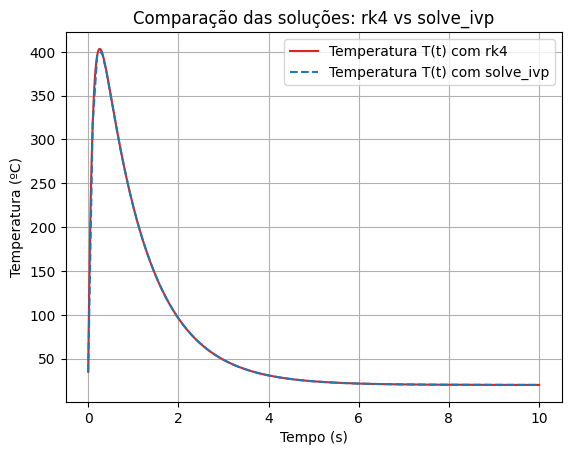

In [7]:
from scipy.integrate import solve_ivp

def sistema_ivp(t, x):
    f1, f2 = x
    dx1dt = -np.exp((-10)/(f2+273))*f1
    dx2dt = (1000*np.exp((-10)/(f2+273))*f1)-(10*(f2-20))
    return [dx1dt, dx2dt]

sol_ivp = solve_ivp(sistema_ivp, [0, 10], x0, t_eval=np.linspace(0, 10, 101))

plt.plot(t, solucao[:, 1], label='Temperatura T(t) com rk4', color='tab:red')
plt.plot(sol_ivp.t, sol_ivp.y[1], '--', label='Temperatura T(t) com solve_ivp', color='tab:blue')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (ºC)')
titulo = 'Comparação das soluções: rk4 vs solve_ivp'
plt.title(titulo)
plt.grid()
plt.legend()
plt.savefig('docs/img/trab1/'+titulo+'.png')

Comparando os passos de tempo para solução:

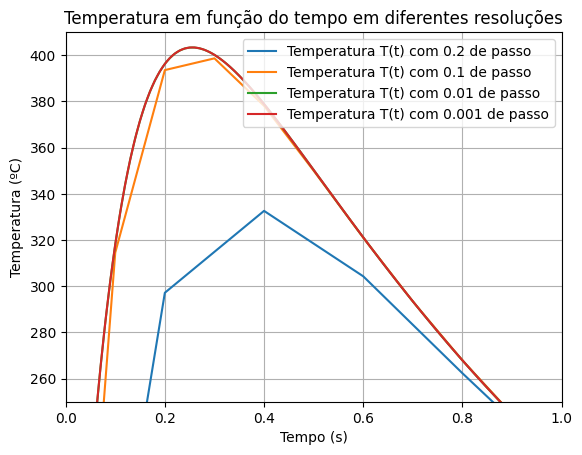

In [8]:
Tini = 35  # temperatura inicial em graus Celsius
Cini = 5  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = [np.linspace(0, 10, 51), np.linspace(0, 10, 101), np.linspace(0, 10, 1001), np.linspace(0, 10, 10001)]  # vetor de tempo de 0 a 10 segundos com diferentes resoluções

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 1], label=f'Temperatura T(t) com {tempo[-1]/(len(tempo)-1)} de passo')  # plota o gráfico da temperatura

titulo = 'Temperatura em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.axis([0, 1, 250, 410])
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (ºC)')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('docs/img/trab1/'+titulo+'.png')

O mesmo para a concentração:

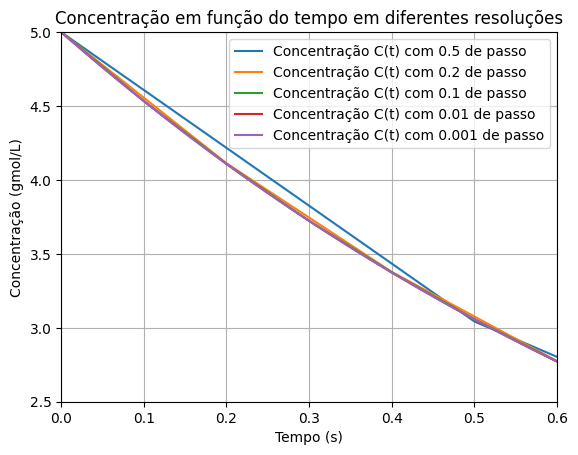

In [15]:
Tini = 35  # temperatura inicial em graus Celsius
Cini = 5  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = [np.linspace(0, 10, 21), np.linspace(0, 10, 51), np.linspace(0, 10, 101), np.linspace(0, 10, 1001), np.linspace(0, 10, 10001)]  # vetor de tempo de 0 a 10 segundos com diferentes resoluções

solucao = [rk4(sistema, x0, tempo) for tempo in t]

for tempo, sol in zip(t, solucao):
    plt.plot(tempo, sol[:, 0], label=f'Concentração C(t) com {tempo[-1]/(len(tempo)-1)} de passo')  # plota o gráfico da temperatura

titulo = 'Concentração em função do tempo em diferentes resoluções'
plt.title(titulo)
plt.axis([0, 0.6, 2.5, 5])
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração (gmol/L)')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('docs/img/trab1/'+titulo+'.png')

Plotando diferentes condições iniciais

Comparando variações nas condições iniciais de temperatura:

Máximo T=401.78 ºC em t=0.26 s
Máximo T=401.94 ºC em t=0.26 s
Máximo T=402.09 ºC em t=0.26 s
Máximo T=402.25 ºC em t=0.26 s
Máximo T=402.41 ºC em t=0.26 s
Máximo T=402.57 ºC em t=0.26 s
Máximo T=402.73 ºC em t=0.26 s
Máximo T=402.89 ºC em t=0.26 s
Média dos últimos valores: 20.0002615943 ºC
Média dos máximos valores: 402.33 ºC


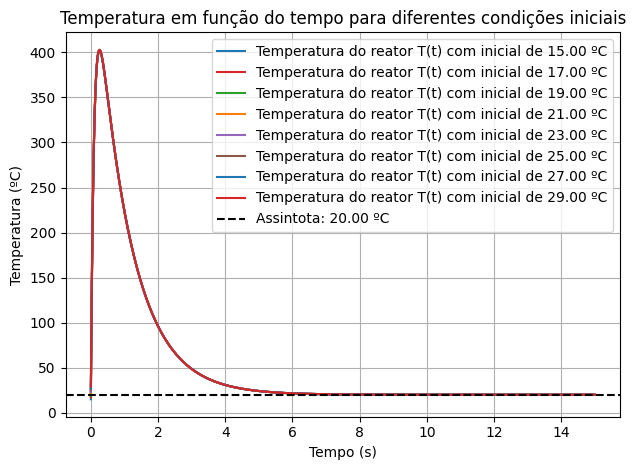

In [10]:
Tini = np.arange(15, 30, 2)  # temperatura inicial em graus Celsius
Cini = 5  # concentração inicial em gmol/L

x0 = [Cini, Tini]  # vetor de condições iniciais
t = np.linspace(0, 15, 1001)  # vetor de tempo de 0 a 10 segundos com resolução de 0.01 segundos

solucao = np.array([rk4(sistema, [Cini, T], t) for T in Tini])

fig, ax = plt.subplots()

plotT = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']

for i, T in enumerate(Tini):
    plotT.append(ax.plot(t, solucao[i][:, 1], label=f'Temperatura do reator T(t) com inicial de {T:.2f} ºC', color=cor[i % len(cor)]))

ax.set_ylabel('Temperatura (ºC)')
plt.xlabel('Tempo (s)')
titulo = 'Temperatura em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

# Calcula a média dos últimos valores de cada solução
media_finais = np.mean(solucao[:, -1, 1])

# Plota uma linha preta horizontal na média dos últimos valores
ax.axhline(media_finais, color='black', linestyle='--', label=f'Assintota: {media_finais:.2f} ºC')

# Calcula o valor máximo de cada curva e o tempo em que ocorre
valores_maximos = np.max(solucao[:, :, 1], axis=1)
tempos_maximos = t[np.argmax(solucao[:, :, 1], axis=1)]

# Printe os pontos máximos
for i, T in enumerate(Tini):
    print(f'Máximo T={valores_maximos[i]:.2f} ºC em t={tempos_maximos[i]:.2f} s')

print(f'Média dos últimos valores: {media_finais:.10f} ºC')
print(f'Média dos máximos valores: {np.mean(valores_maximos):.2f} ºC')

# Ajustando as legendas para garantir que todas as linhas sejam identificáveis
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

fig.tight_layout()
# plt.show()
plt.savefig('docs/img/trab1/'+titulo+'.png')


Continuando similar com a concentração:

Média dos últimos valores: 0.0000026054 gmol/L


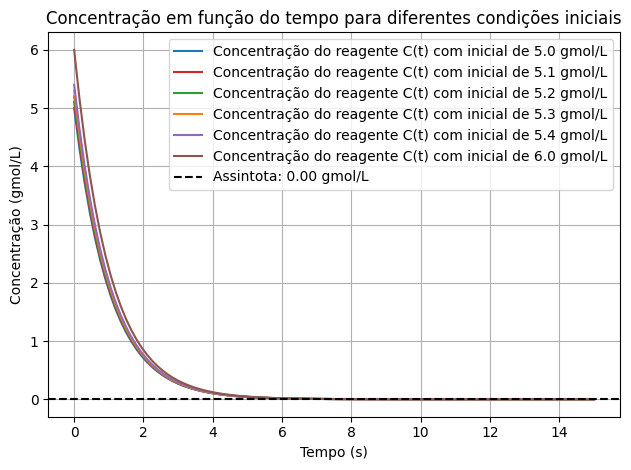

In [11]:
Cini = np.arange(5, 5.5, 0.1)  # concentração inicial em gmol/L
Cini = np.append(Cini, 6)  # concentração inicial em gmol/L
Tini = 15  # temperatura inicial em graus Celsius

x0 = [Cini, Tini]  # vetor de condições iniciais
t = np.linspace(0, 15, 101)  # vetor de tempo de 0 a 10 segundos com resolução de 0.1 segundos

solucao = np.array([rk4(sistema, [C, Tini], t) for C in Cini])

fig, ax = plt.subplots()

plotC = []
cor = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:brown']

for j, C in enumerate(Cini):
    plotC.append(ax.plot(t, solucao[j][:, 0], label=f'Concentração do reagente C(t) com inicial de {C:.1f} gmol/L', color=cor[j % len(cor)]))

titulo = f'Temperatura inicial {Tini} ºC e concentração inicial {Cini} gmol/L'
ax.set_ylabel('Concentração (gmol/L)')
plt.xlabel('Tempo (s)')
titulo = 'Concentração em função do tempo para diferentes condições iniciais'
plt.title(titulo)
plt.grid()

# Calcula a média dos últimos valores de cada solução
media_finais = np.mean(solucao[:, -1, 0])

# Plota uma linha preta horizontal na média dos últimos valores
ax.axhline(media_finais, color='black', linestyle='--', label=f'Assintota: {media_finais:.2f} gmol/L')

print(f'Média dos últimos valores: {media_finais:.10f} gmol/L')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

fig.tight_layout()
# plt.show()
plt.savefig('docs/img/trab1/'+titulo+'.png')
